**Librerías**

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## **Revisión de Datos**

In [8]:
path = 'Data/data-even.csv'
data = pd.read_csv(path)

data

,Age,Education,EducationNum,MaritalStatus,Relationship,Gender,CapitalGain,HoursPerWeek
0,39,Bachelors,13,Never-married,Not-in-family,Male,2174,40
1,50,Bachelors,13,Married-civ-spouse,Husband,Male,0,13
2,52,HS-grad,9,Married-civ-spouse,Husband,Male,0,45
3,30,Bachelors,13,Married-civ-spouse,Husband,Male,0,40
4,25,HS-grad,9,Never-married,Own-child,Male,0,35
...,...,...,...,...,...,...,...,...
9860,39,Assoc-acdm,12,Married-civ-spouse,Wife,Female,0,20
9861,65,Prof-school,15,Never-married,Not-in-family,Male,1086,60
9862,43,Some-college,10,Divorced,Other-relative,Female,0,40
9863,43,Some-college,10,Married-civ-spouse,Husband,Male,0,50


In [9]:
data.describe()

,Age,EducationNum,CapitalGain,HoursPerWeek
count,9865.000000,9865.000000,9865.000000,9865.000000
mean,42.686163,10.543031,1511.164420,40.829397
std,14.539611,2.685759,9209.395181,14.543395
min,17.000000,1.000000,0.000000,1.000000
25%,32.000000,9.000000,0.000000,38.000000
50%,42.000000,10.000000,0.000000,40.000000
75%,53.000000,13.000000,0.000000,48.000000
max,90.000000,16.000000,99999.000000,99.000000


In [10]:
print("El cojunto de datos original tiene {} observaciones y {} variables".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos original tiene 9865 observaciones y 8 variables
Las columnas son: ['Age', 'Education', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


### **Variables**

- **Age**: edad en años.
- **Education**: nivel de educación.
- **Education Num**: años de educación (versión númerica de **Education**).
- **MaritalStatus**: estado marital.
- **Relationship**: rol familiar.
- **Gender**: género.
- **CapitalGain**: ganancias desde la capital.
- **HoursPerWeek**: horas trabajadas por semana. 

Vista de las primeras cinco filas.

In [11]:
data.head()

,Age,Education,EducationNum,MaritalStatus,Relationship,Gender,CapitalGain,HoursPerWeek
0,39,Bachelors,13,Never-married,Not-in-family,Male,2174,40
1,50,Bachelors,13,Married-civ-spouse,Husband,Male,0,13
2,52,HS-grad,9,Married-civ-spouse,Husband,Male,0,45
3,30,Bachelors,13,Married-civ-spouse,Husband,Male,0,40
4,25,HS-grad,9,Never-married,Own-child,Male,0,35


- **¿Hay filas innecesarias?**

Verificamos si existen filas duplicadas en el conjunto de datos.

In [12]:
duplicados = data[data.duplicated()]
print(f"Número de filas duplicadas: {len(duplicados)}")
#print(duplicados)

Número de filas duplicadas: 2810


Como existen datos duplicados entonces eliminamos esas filas, excepto la primer ocurrencia que encontremos. 

In [13]:
data = data.drop_duplicates(keep='first')

- **Tipo de dato de las columnas**

In [14]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
Education        object
EducationNum      int64
MaritalStatus    object
Relationship     object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


La columna de **'Education'** ya tiene una equivalencia numérica en la columna **'EducationNum'**, por lo tanto sería redundante convertir esa columna categórica a una númerica.

In [15]:
data.drop(data.columns[1], inplace=True, axis=1)
print("El cojunto de datos ahora tiene {} observaciones y {} columnas".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos ahora tiene 7055 observaciones y 7 columnas
Las columnas son: ['Age', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


C:\Users\paola\AppData\Local\Temp\ipykernel_4428\3952138140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.columns[1], inplace=True, axis=1)


- **¿Hay valores vacíos en la hoja de datos?**

In [16]:
print("Valores faltantes en cada columna:\n{}".format(data.isnull().sum()))

Valores faltantes en cada columna:
Age              0
EducationNum     0
MaritalStatus    0
Relationship     0
Gender           0
CapitalGain      0
HoursPerWeek     0
dtype: int64


Notamos que no hay variables faltantes en el conjunto de datos, lo cual es excelente ya que no necesitamos modificarlo.

- **Tipo de datos por columna**

In [17]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
EducationNum      int64
MaritalStatus    object
Relationship     object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


Existen:
- 4 variables númericas (todas con valores enteros)
- 3 variables categóricas.

### **Análisis de Variables Categóricas**

In [18]:
print("Valores de cada columna categórica:")
for columna in data.select_dtypes(include=[object]):
    print(columna, ":", data[columna].unique())

Valores de cada columna categórica:
MaritalStatus : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
Relationship : [' Not-in-family' ' Husband' ' Own-child' ' Unmarried' ' Wife'
 ' Other-relative']
Gender : [' Male' ' Female']


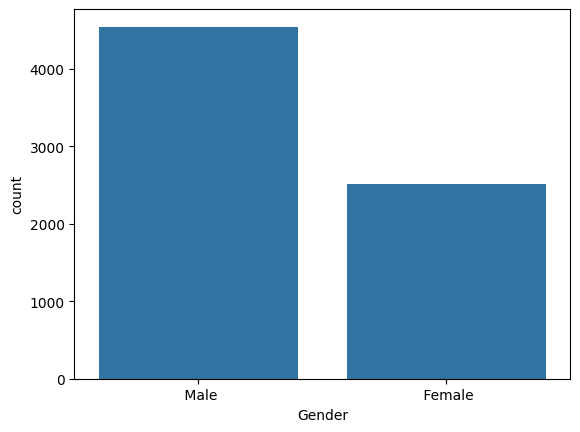

In [19]:
sns.countplot(data=data, x='Gender')
plt.show()

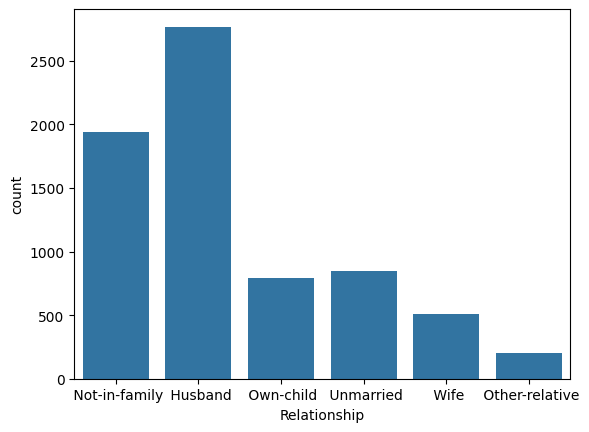

In [20]:
sns.countplot(data=data, x='Relationship')
plt.show()

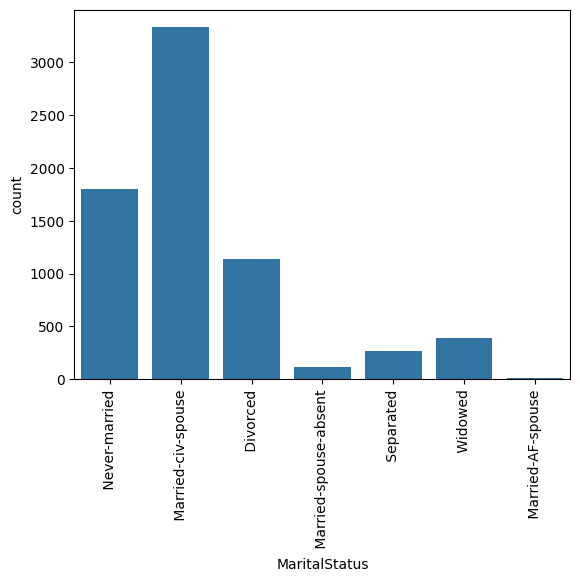

In [21]:
sns.countplot(data = data, x = 'MaritalStatus')
plt.xticks(rotation = 90)
plt.show()

Para **MaritalStatus** y **Relationship** notamos que tienen varios estados, pero no hay un orden natural visible entre ellos. Por eso mismo, se decidió utilizar OneHotEncoder.

Sin embargo, **Gender** es fácilmente clasificable entre fememino y masculino.

## **Preprocesamiento**

Convertir variables categóricas a númericas. 

- MaritalStatus
- Relationship
- Gender

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = ['Age', 'EducationNum', 'CapitalGain', 'HoursPerWeek']
cat_cols = ['MaritalStatus', 'Relationship', 'Gender']

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop = 'first')),
    # ('scaler', StandardScaler(with_mean = False))
])

ct = ColumnTransformer(
    [
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

cluster1_data = ct.fit_transform(data)

cluster1_df = pd.DataFrame(
    cluster1_data,
    columns=ct.get_feature_names_out()
)

cluster1_df

,num__Age,num__EducationNum,num__CapitalGain,num__HoursPerWeek,cat__MaritalStatus_ Married-AF-spouse,cat__MaritalStatus_ Married-civ-spouse,cat__MaritalStatus_ Married-spouse-absent,cat__MaritalStatus_ Never-married,cat__MaritalStatus_ Separated,cat__MaritalStatus_ Widowed,cat__Relationship_ Not-in-family,cat__Relationship_ Other-relative,cat__Relationship_ Own-child,cat__Relationship_ Unmarried,cat__Relationship_ Wife,cat__Gender_ Male
0,-0.315390,0.852018,0.009877,-0.032797,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.417924,0.852018,-0.191221,-1.694790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.551254,-0.537645,-0.191221,0.274979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.915374,0.852018,-0.191221,-0.032797,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.248698,-0.537645,-0.191221,-0.340574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7050,0.084600,0.504602,-0.191221,0.459645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7051,-0.315390,0.504602,-0.191221,-1.263903,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7052,1.417898,1.546850,-0.090764,1.198308,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7053,-0.048730,-0.190229,-0.191221,-0.032797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
print("Dimensiones:", cluster1_df.shape)
print("Varianza media por columna:", cluster1_df.var().mean())


Dimensiones: (7055, 16)
Varianza media por columna: 0.32968388589632625


In [24]:
cluster1_df.describe()

,num__Age,num__EducationNum,num__CapitalGain,num__HoursPerWeek,cat__MaritalStatus_ Married-AF-spouse,cat__MaritalStatus_ Married-civ-spouse,cat__MaritalStatus_ Married-spouse-absent,cat__MaritalStatus_ Never-married,cat__MaritalStatus_ Separated,cat__MaritalStatus_ Widowed,cat__Relationship_ Not-in-family,cat__Relationship_ Other-relative,cat__Relationship_ Own-child,cat__Relationship_ Unmarried,cat__Relationship_ Wife,cat__Gender_ Male
count,7.055000e+03,7.055000e+03,7.055000e+03,7.055000e+03,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000
mean,-8.862900e-17,1.258935e-16,-4.834309e-17,1.732294e-16,0.001134,0.472147,0.016442,0.255705,0.037987,0.055847,0.275408,0.028349,0.112119,0.119631,0.072006,0.643940
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.033657,0.499259,0.127178,0.436288,0.191179,0.229642,0.446751,0.165979,0.315535,0.324553,0.258516,0.478867
min,-1.782017e+00,-3.316972e+00,-1.912206e-01,-2.433454e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.820439e-01,-5.376451e-01,-1.912206e-01,-3.405740e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.873010e-02,-1.902292e-01,-1.912206e-01,-3.279750e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.845837e-01,8.520182e-01,-1.912206e-01,5.827555e-01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.084520e+00,1.894266e+00,9.058790e+00,3.598965e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **K-Means**

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=40)
kmeans.fit(cluster1_data)
labels = kmeans.labels_

# Calculo del silhouette 
silhouette_avg = silhouette_score(cluster1_data, labels)
print(f"Score de Silueta para k={k}: {silhouette_avg:.4f}")



Score de Silueta para k=3: 0.1900


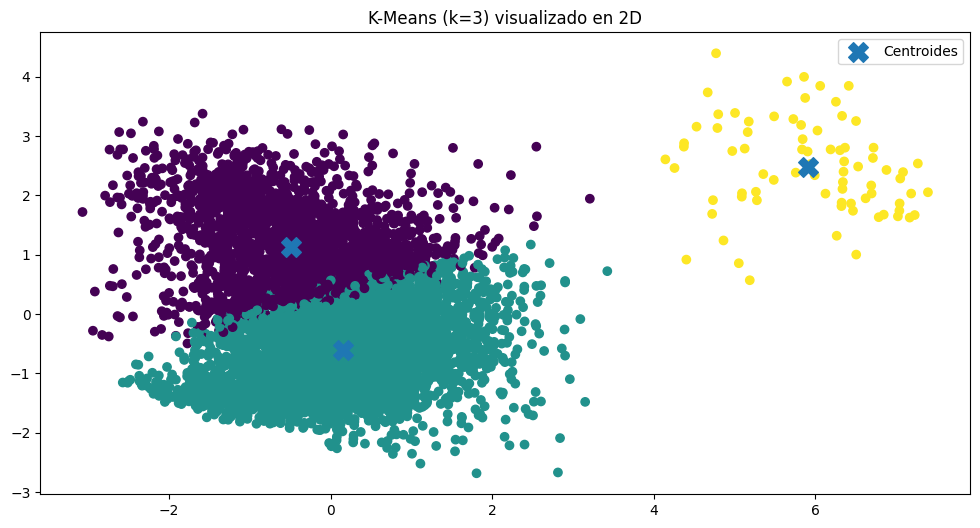

In [26]:
from sklearn.decomposition import PCA
# PCA a 2D para visualización
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster1_data)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Graficar
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X_pca[:,0], X_pca[:,1], c=labels) 
ax.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='X', s=200, label='Centroides')
ax.set_title(f"K-Means (k={k}) visualizado en 2D")
ax.legend()
plt.show()

**Prueba del Codo**

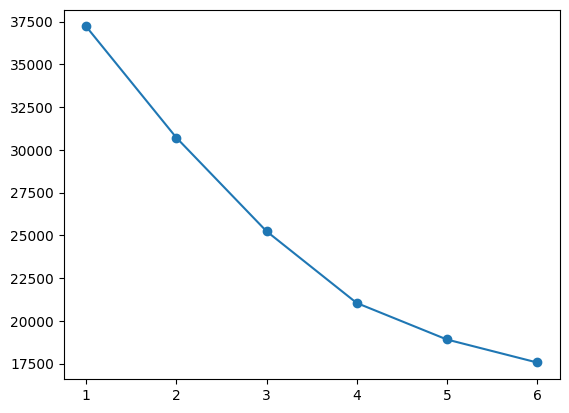

In [27]:
clusters_range = [1,2,3,4,5,6]
inertias = []
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=20).fit(cluster1_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

## **DBSCAN**

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=4)
labels_dbscan = dbscan.fit_predict(cluster1_df)

C:\Users\paola\AppData\Local\Temp\ipykernel_4428\224632020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels_dbscan


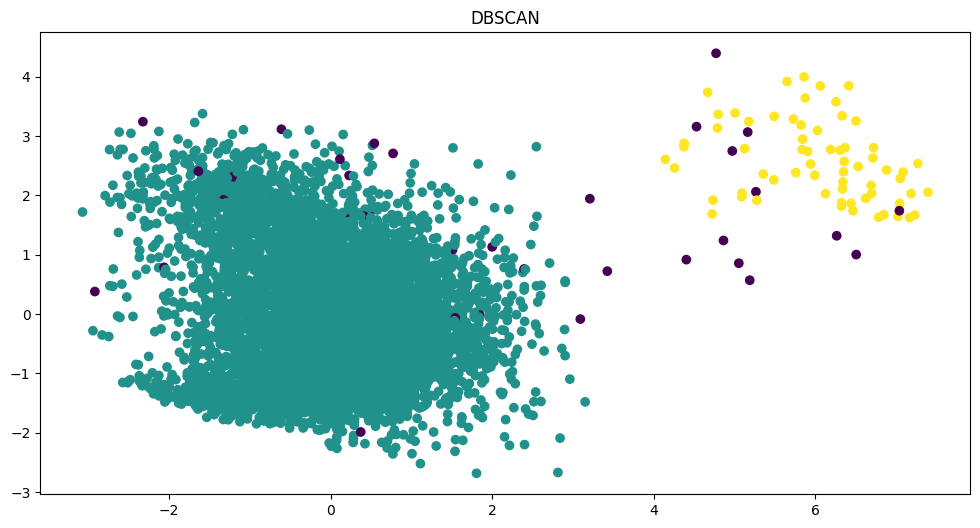

In [29]:
from sklearn.decomposition import PCA
data['Cluster'] = labels_dbscan

pca = PCA(n_components=10, random_state=42)
reduced = pca.fit_transform(cluster1_df)

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(reduced[:, 0], reduced[:, 1], c=labels_dbscan)
ax.set_title("DBSCAN")
plt.show()

eps=0.30 -> Silhouette Score: -0.012
eps=0.40 -> Silhouette Score: -0.113
eps=0.50 -> Silhouette Score: -0.052
eps=0.60 -> Silhouette Score: -0.032
eps=0.70 -> Silhouette Score: -0.011
eps=0.80 -> Silhouette Score: 0.001
eps=0.90 -> Silhouette Score: 0.007
eps=1.00 -> Silhouette Score: 0.045
eps=1.10 -> Silhouette Score: 0.027
eps=1.20 -> Silhouette Score: 0.043
eps=1.30 -> Silhouette Score: 0.041
eps=1.40 -> Silhouette Score: 0.051
eps=1.50 -> Silhouette Score: 0.709
eps=1.60 -> Silhouette Score: 0.708
eps=1.70 -> Silhouette Score: 0.708
eps=1.80 -> Silhouette Score: 0.708
eps=1.90 -> Silhouette Score: 0.708
eps=2.00 -> Silhouette Score: 0.708


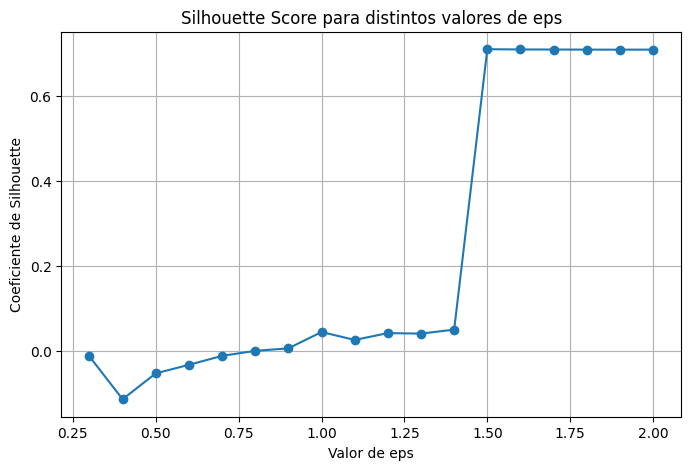

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Suponemos que ya tienes tus datos escalados en 'cluster1_df'
# cluster1_df = ...

# Definir el rango de eps que queremos probar
eps_values = np.arange(0.3, 2.1, 0.1)  # desde 0.3 hasta 2.0, en pasos de 0.1
min_samples = 5  # puedes ajustar este valor según tu caso

silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(cluster1_df)

    # Filtrar el ruido (-1)
    mask = labels != -1
    labels_filtered = labels[mask]
    data_filtered = cluster1_df[mask]

    # Calcular el silhouette solo si hay al menos 2 clusters válidos
    if len(set(labels_filtered)) > 1:
        sil_score = silhouette_score(data_filtered, labels_filtered)
        silhouette_scores.append(sil_score)
        print(f"eps={eps:.2f} -> Silhouette Score: {sil_score:.3f}")
    else:
        silhouette_scores.append(np.nan)
        print(f"eps={eps:.2f} -> No se pudo calcular (1 cluster o todo ruido)")

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Silhouette Score para distintos valores de eps')
plt.xlabel('Valor de eps')
plt.ylabel('Coeficiente de Silhouette')
plt.grid(True)
plt.show()
